# The notebook checking emn_train.py

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io

from torch.utils.data import DataLoader

from vos.datasets.video_synth import VideoSynthDataset
from vos.datasets.COCO import COCO

In [2]:
cocoroot = "/p300/videoObjSeg_dataset/COCO-2017-train"
videod = VideoSynthDataset(
    COCO(cocoroot, mode= "train", max_n_objects= 8),
    n_frames= 3,
    affine_kwargs= dict(
        angle_max= 15.,
        translate_max= 15.,
        scale_max= 0.1, # NOTE: this is the exponent of e
        shear_max= 15.
    ),
)
dataloader = DataLoader(videod, batch_size= 2, shuffle= True)

loading annotations into memory...
Done (t=39.15s)
creating index...
index created!


### Get images and masks (in batch)

In [3]:
iterator = dataloader.__iter__()
batch = iterator.next()
print(batch.keys())

dict_keys(['mask', 'n_objects', 'video'])


### Check mask_targets

In [16]:
from vos.algo.emn_train import mask_targets, extract_targets

In [17]:
frames = batch["video"]
masks = batch["mask"]
n_objects = batch["n_objects"]
print(n_objects, n_objects.dtype)
targets = mask_targets(frames[:,0], masks[:,0], n_objects)
print(targets.shape)

tensor([2, 3]) torch.int64
torch.Size([2, 3, 3, 384, 384])


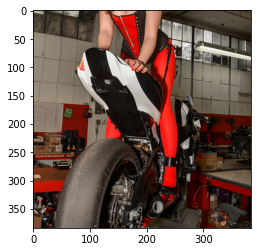

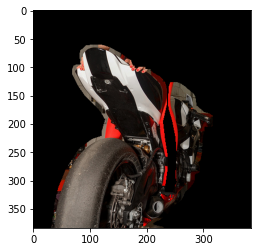

In [18]:
b_i = 0 # np.random.choice(targets.shape[0], 1)[0]
n_i = 0

to_show = frames[b_i,0].numpy().transpose(1,2,0)
plt.imshow(to_show)

to_show = targets[b_i,n_i].numpy().transpose(1,2,0)
plt.figure()
plt.imshow(to_show)

### Check extract_targets

In [19]:
ex_targets = extract_targets(targets, masks[:,0], n_objects)
print(ex_targets.shape)

torch.Size([2, 3, 3, 340, 285])


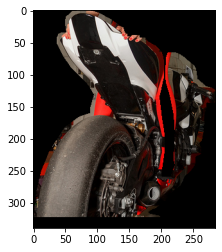

In [20]:
b_i = 0 # np.random.choice(ex_targets.shape[0], 1)[0]
n_i = 0

to_show = ex_targets[b_i, n_i].numpy().transpose(1,2,0)
plt.imshow(to_show)